In [24]:
import sqlite3

In [25]:
connection=sqlite3.connect('student_grades.db')

In [26]:
cursor=connection.cursor()

In [4]:
cursor.execute('CREATE TABLE IF NOT EXISTS students(student_id INTEGER PRIMARY KEY AUTOINCREMENT,first_name TEXT,last_name TEXT)')

In [17]:
cursor.execute('CREATE TABLE IF NOT EXISTS grades(grade_id INTEGER PRIMARY KEY AUTOINCREMENT,student_id INTEGER, subject TEXT, grade INTEGER, FOREIGN KEY(student_id) REFERENCES students(student_id))')

In [7]:
#insert data
student_data=[(1,'Alice','Johnson'),(2,'Bob','Smith'),(3,'Carol','White'),(4,'David','Brown'),(5,'Eve','Davis')]
cursor.executemany('''INSERT INTO students (student_id,first_name,last_name) VALUES (?,?,?)''',student_data)
connection.commit()

IntegrityError: UNIQUE constraint failed: students.student_id

In [18]:
#insert data
grade_data=[(1,1,'Math',95),(2,1,'English',88),(3,1,'History',90),(4,2,'Math',82),(5,2,'English',76),(6,2,'History',85),(7,3,'Math',91),(8,3,'English',82),(9,3,'History',98),(10,4,'Math',70),(11,4,'English',90),(12,4,'History',50),(13,5,'Math',80),(14,5,'English',75),(15,5,'History',100)]
cursor.executemany('''INSERT INTO grades (grade_id,student_id,subject,grade) VALUES (?,?,?,?)''',grade_data)
connection.commit()

In [38]:
#query 1
cursor.execute('''SELECT students.first_name,students.last_name,grades.grade FROM students
JOIN grades ON students.student_id=grades.student_id''')
print(cursor.fetchall())

[('Alice', 'Johnson', 95), ('Alice', 'Johnson', 88), ('Alice', 'Johnson', 90), ('Bob', 'Smith', 82), ('Bob', 'Smith', 76), ('Bob', 'Smith', 85), ('Carol', 'White', 91), ('Carol', 'White', 82), ('Carol', 'White', 98), ('David', 'Brown', 70), ('David', 'Brown', 90), ('David', 'Brown', 50), ('Eve', 'Davis', 80), ('Eve', 'Davis', 75), ('Eve', 'Davis', 100)]


In [49]:
#query 2
cursor.execute('''SELECT students.first_name,students.last_name,students.student_id,avg(grades.grade) FROM students
JOIN grades ON students.student_id=grades.student_id GROUP BY students.student_id''')
print(cursor.fetchall())

[('Alice', 'Johnson', 1, 91.0), ('Bob', 'Smith', 2, 81.0), ('Carol', 'White', 3, 90.33333333333333), ('David', 'Brown', 4, 70.0), ('Eve', 'Davis', 5, 85.0)]


In [52]:
#query 3
cursor.execute('''SELECT students.first_name,students.last_name,students.student_id,avg(grades.grade) FROM students
JOIN grades ON students.student_id=grades.student_id GROUP BY students.student_id ORDER BY avg(grades.grade) DESC''')
print(cursor.fetchone())

('Alice', 'Johnson', 1, 91.0)


In [55]:
#query 4
cursor.execute('''SELECT subject,avg(grade) FROM grades WHERE subject='Math'
GROUP BY subject''')
print(cursor.fetchall())

[('Math', 83.6)]


In [70]:
#query 5
cursor.execute('''SELECT students.first_name,students.last_name FROM students
JOIN grades ON students.student_id=grades.student_id WHERE grade>90 GROUP BY students.student_id''')
print(cursor.fetchall())

[('Alice', 'Johnson'), ('Carol', 'White'), ('Eve', 'Davis')]


In [102]:
#Load data into Pandas
import pandas as pd
students=pd.read_sql('''SELECT * from students''',connection)
students
grades=pd.read_sql('''SELECT * from grades''',connection)
grades
combined=pd.read_sql('''SELECT first_name,last_name,subject,grade from students JOIN grades on students.student_id=grades.student_id''',connection)
combined

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76
5,Bob,Smith,History,85
6,Carol,White,Math,91
7,Carol,White,English,82
8,Carol,White,History,98
9,David,Brown,Math,70


<BarContainer object of 5 artists>

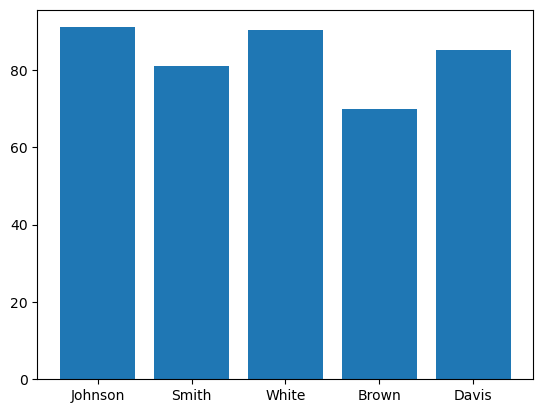

In [100]:
#Chart 1
import matplotlib.pyplot as plt
stud_avgs=pd.read_sql('''SELECT first_name,last_name,subject,avg(grade) from students JOIN grades on students.student_id=grades.student_id GROUP BY students.student_id''',connection)
plt.bar(stud_avgs['last_name'],stud_avgs['avg(grade)'])

<BarContainer object of 3 artists>

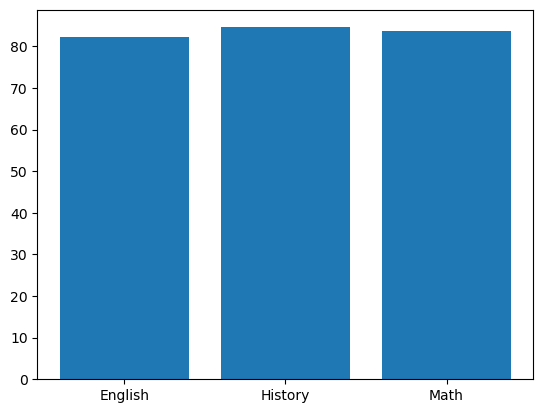

In [101]:
#Chart 2
subj_avgs=pd.read_sql('''SELECT subject,avg(grade) from students JOIN grades on students.student_id=grades.student_id GROUP BY subject''',connection)
plt.bar(subj_avgs['subject'],subj_avgs['avg(grade)'])